# Import Libraries For EDA :-

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import warnings

In [1]:
data_path = r"D:\Data Science\MachineLearning\Project\UnderProcessProject\Mlops_Project2_US_Visa_Approval_Prediction\notebook\Visadataset.csv"

In [3]:
data = pd.read_csv(data_path)
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Data Shape

In [4]:
data.shape

(25480, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [7]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [110]:
data.isnull().sum().to_frame()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [9]:
data.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [19]:
numerical_feature = [i for i in data.select_dtypes(exclude='object').columns ]
categorical_feature = [i for i in data.select_dtypes(include='object').columns ]

print('I have total {} Numerical columns : {}'.format(len(numerical_feature),numerical_feature) )
print('I have total {} categorical columns : {}'.format(len(categorical_feature),categorical_feature) )

I have total 3 Numerical columns : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
I have total 9 categorical columns : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


##### Proportion of  data count of categorical column  :  i.e we will calculate percentage of every unique value  in categorical column

In [113]:
data['case_status'].value_counts().to_frame()

,count
case_status,
Certified,17018
Denied,8462


In [22]:

for col in categorical_feature:
    print(data[col].value_counts(normalize =True))
    print("*************************************************")

case_id
EZYV25480    0.000039
EZYV01       0.000039
EZYV02       0.000039
EZYV03       0.000039
EZYV04       0.000039
               ...   
EZYV13       0.000039
EZYV12       0.000039
EZYV11       0.000039
EZYV10       0.000039
EZYV09       0.000039
Name: proportion, Length: 25480, dtype: float64
*************************************************
continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
*************************************************
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
*************************************************
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
*************************************************
requires_job_training
N    0.884027
Y    0.115973
Name: proportion, dtyp

1. "case_id" column is unique value for eachrow so we can drop it as it is not making any impact on target column 
2. continent column is highly biased column alsomst 65% portion is occupied by single value so we have to work on it 
3. 

## Univariate Analysis:-
##### We are going to analyse one column at a time 

### Steps for Univariate Analysis of Numerical Columns
1. Descriptive Statistics: Calculate basic statistics like mean, median, standard deviation, min, max, and quartiles.
2. Visualization: Create plots to visualize the distribution and identify patterns or outliers.
   1. Histogram
   2. Box Plot
   3. KDE Plot (Kernel Density Estimation)

In [116]:
data.columns.to_list()

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'no_of_employees',
 'yr_of_estab',
 'region_of_employment',
 'prevailing_wage',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [117]:
print(numerical_feature)
print(categorical_feature)

['no_of_employees', 'yr_of_estab', 'prevailing_wage']
['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [122]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [125]:
for col in numerical_feature:
    print(col)
    print(data[col].describe())
    print("********************************")

no_of_employees
count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64
********************************
yr_of_estab
count    25480.000000
mean      1979.409929
std         42.366929
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64
********************************
prevailing_wage
count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64
********************************


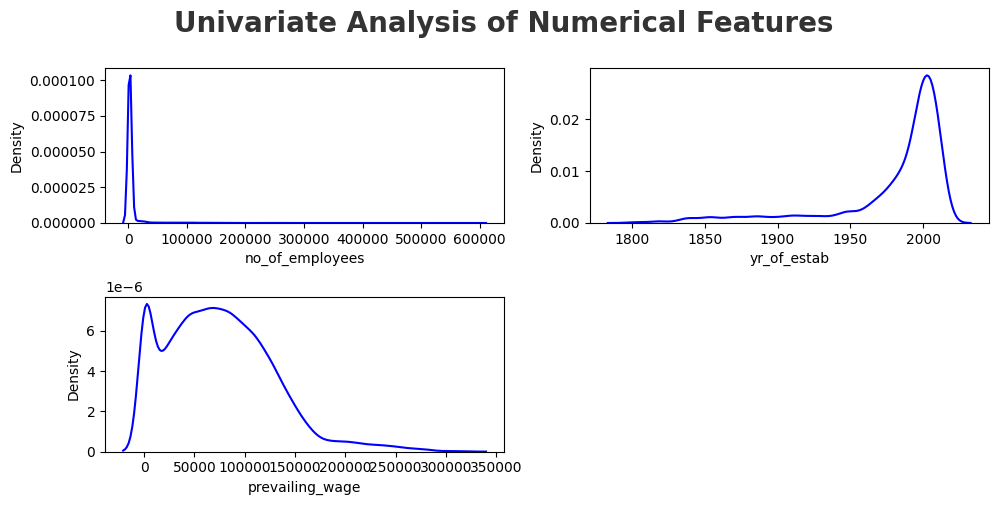

In [28]:
#KDE stands for Kernel Density Estimate
plt.figure(figsize=(10, 5))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_feature)):
    plt.subplot(2, 2, i+1)          #plt.subplot(nrows, ncols, index) (index==position)
    sns.kdeplot(x=data[numerical_feature[i]], color='blue')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

#### Insights
1. no_of_employees column looks more skewed 
2. yr_of_estab is left-skewed.
3. privailing-wage is a right-skewed distribution.


Handling imbalanced data is a common challenge in machine learning. Several techniques can be applied to address this issue and achieve a more balanced and normally distributed dataset. Here are some of the most commonly used techniques:

1. Resampling Techniques
   1. Oversampling: SMOTE      
   2. Undersampling: RandomUnderSampler   


2. Class Weight Adjustment


from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(class_weight='balanced') 

3. Ensemble Techniques
   1. from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier()



brf.fit(X_train, y_train)

4. Generate More Data
a. GANs (Generative Adversarial Networks):

5. Algorithmic Approaches


   Use algorithms that are inherently more robust to imbalanced data, such as tree-based methods (e.g., Random Forest, Gradient Boosting).
6. PowerTransformation:-
  1. Log Transformation
  2. Square Root Transformation:
  3. Cube Root Transformation:

### Categorical Column:-

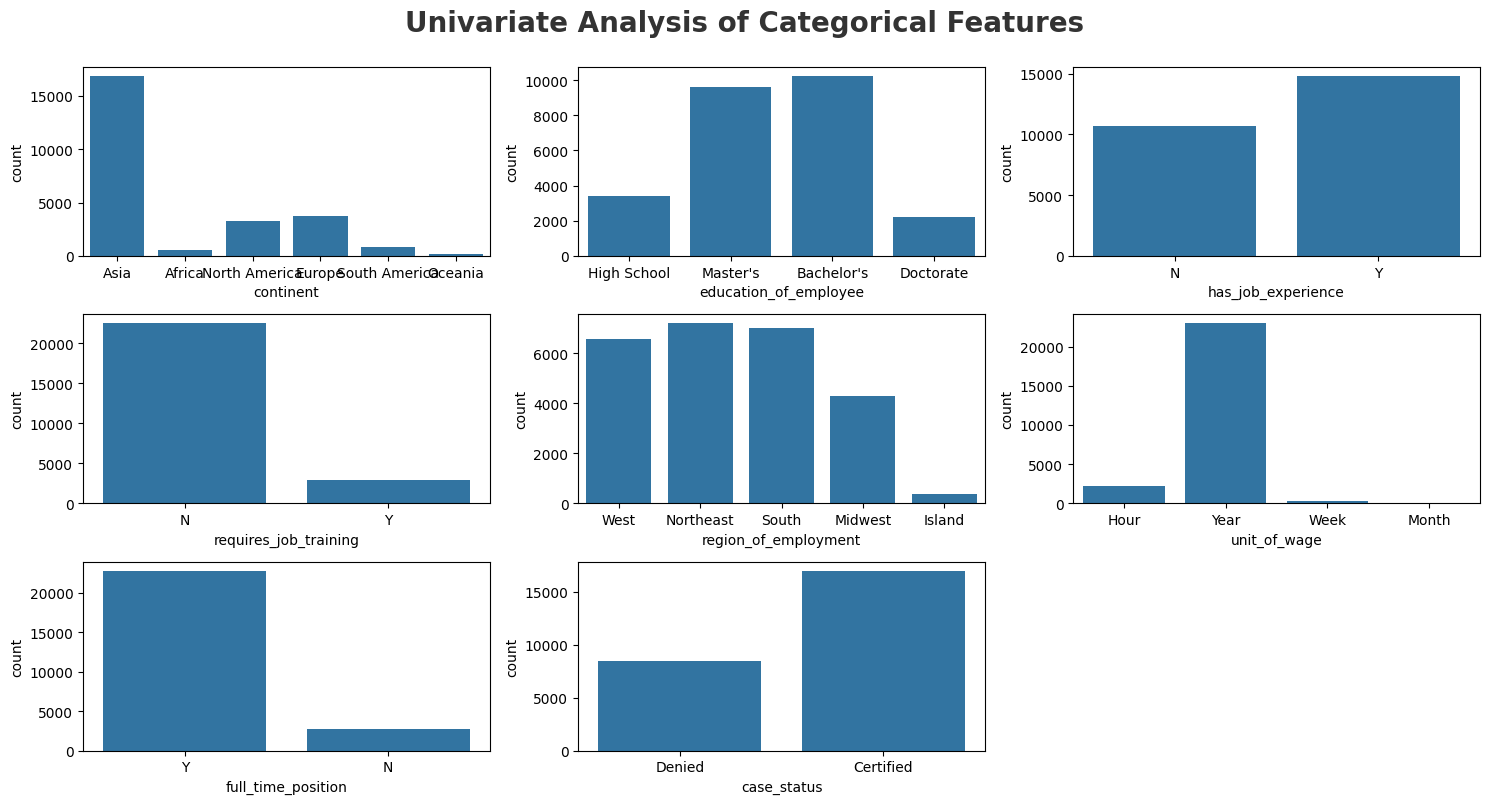

In [29]:
# categorical columns
categorical_feature.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_feature)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=data[categorical_feature[i]])
    plt.xlabel(categorical_feature[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

### Insight
1. continent , require_job_training ,unit_of_wage ,full_time_position are column imbalanced

# Multivariate Analysis:-

1. Analysis of More than One Column:

In [32]:
discrete_features=[feature for feature in numerical_feature if len(data[feature].unique())<=25]

continuous_features=[feature for feature in numerical_feature if len(data[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### Check Multicollinearity in Numerical features

1. Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated
    1. Correlation Matrix: Compute pairwise correlations between predictor variables. High values (close to 1 or -1) indicate potential multicollinearity (For Numerical Columns).
    2. chi_squared test(X2) : Help to find correlation of categorical column with Target column
          1. Null Hypothesis (H0)    : The Feature is independent of target column (No-Correlation)
          2. Alternative Hypothesis(): The Feature and Target column are not independent (Correalted)

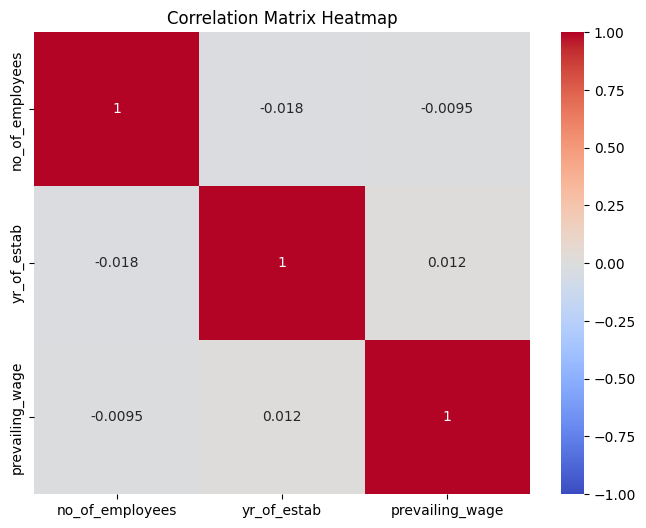

In [34]:
# Correlation matrix for numerical columns:
numerical_df = data[numerical_feature]
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Inight 
1. You can see ther is almost no correlation  in all numerical columns

In [50]:
#Chi Squared test for categorical columns:
# 1. Null Hypothesis (H0): The Feature is independent of target column (No-Correlation)
# 2. Alternative Hypothesis (): The Feature and Target column are not independent (Correalted)


from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_feature:
    if chi2_contingency(pd.crosstab(data['case_status'], data[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_feature, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


#### only "requires_job_training" column is fail to reject null hypothesis (means it doesot correlated with target column)

In [52]:
chi2_contingency(pd.crosstab(data['case_status'] , data['continent']))

Chi2ContingencyResult(statistic=np.float64(351.38040803815284), pvalue=np.float64(8.828798103147952e-74), dof=5, expected_freq=array([[  368.01091052, 11261.40102041,  2492.58932496,  2198.71491366,
          128.23610675,   569.0477237 ],
       [  182.98908948,  5599.59897959,  1239.41067504,  1093.28508634,
           63.76389325,   282.9522763 ]]))

In [53]:
continues_features=[feature for feature in numerical_feature if len(data[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### HistPlot and BoxPlot of Numerical Columns:-

C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_11656\3154343561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_11656\3154343561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_11656\3154343561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='case_status', y=col,  palette=clr1, ax=ax[i

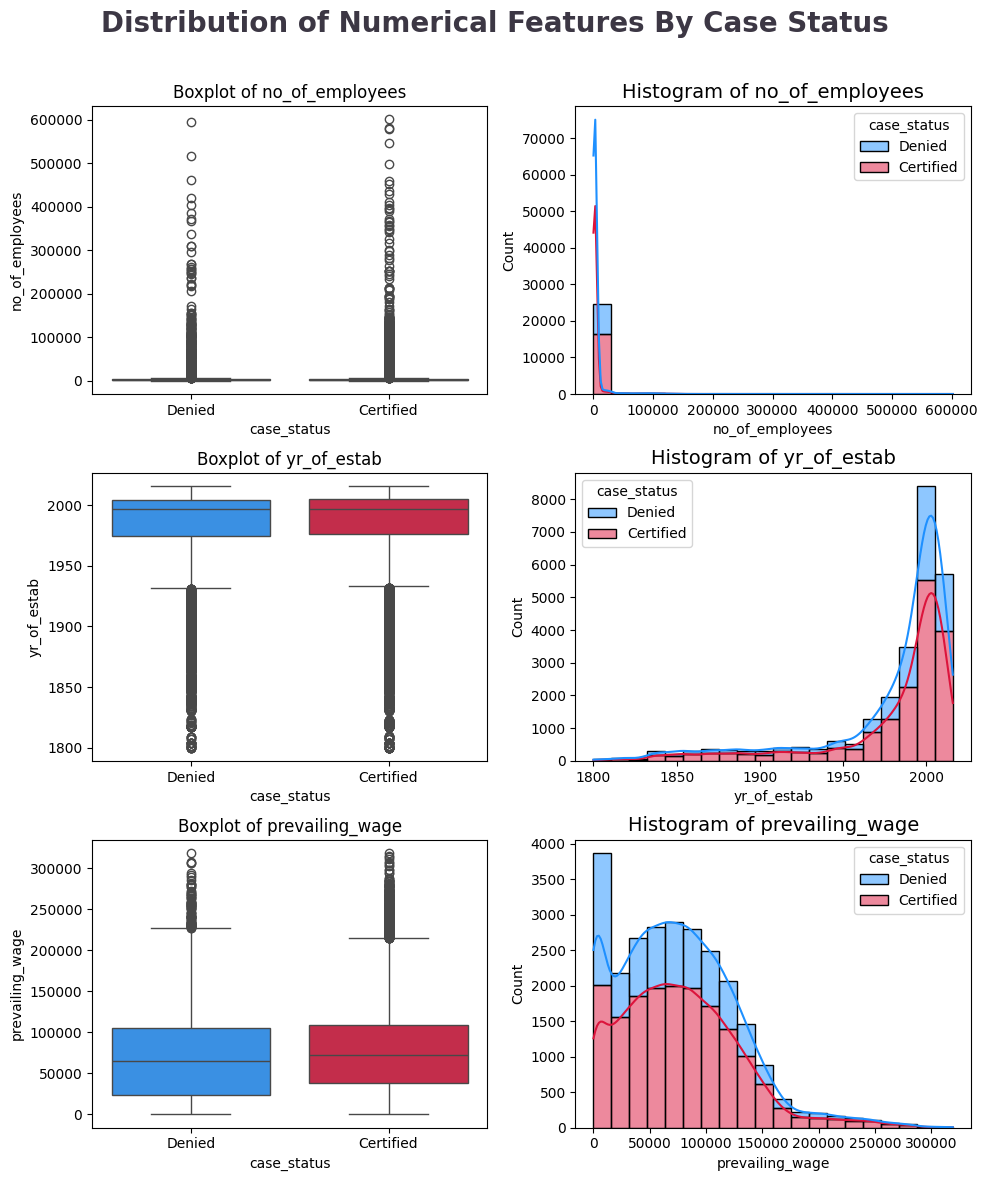

In [54]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=data, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=data, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

## Initial Analysis Report
1. No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.
2. yr_of_estab is left skewed and some outliers below the lower bound of Box plot.
3. prevailing_wage is right skewed with outliers above upper bound of box plot.
4. There are No missing values in the dataset.
5. The case_id column can be deleted because each row has unique values.
6. The case_status column is the target to predict.
7. In the Categorical column, features can be made Binary numerical in feature Encoding

# **Visualization:-**

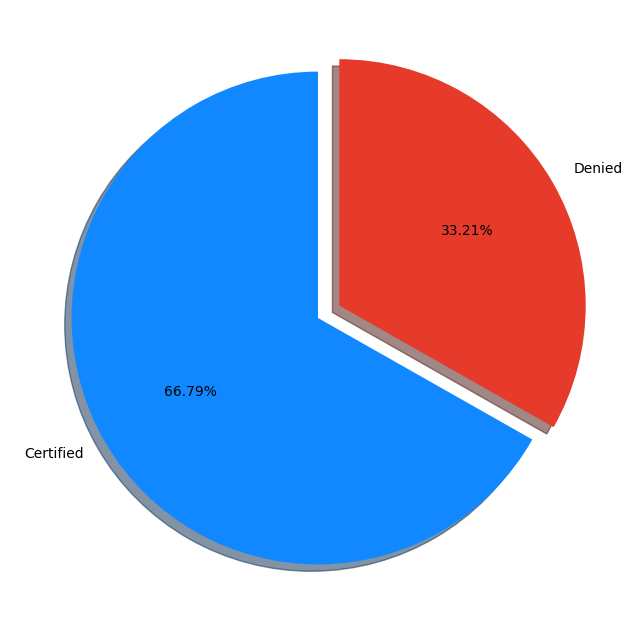

In [61]:
percentage = data.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

### From the chart it is seen that the Target Variable is Imbalanced

In [68]:
#group data by continent and their count of case_status
data.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

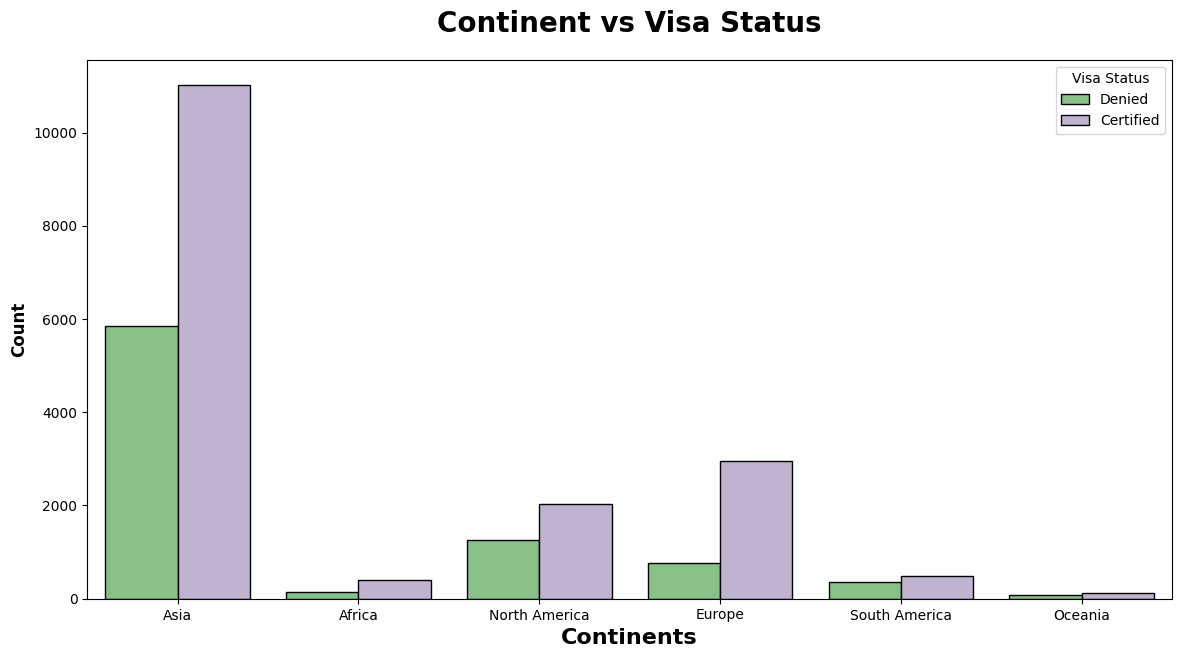

In [69]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=data, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [73]:
df2 = data.copy()

In [131]:
df2['continent'].value_counts(normalize=True)*100

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64

C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_11656\4026917840.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


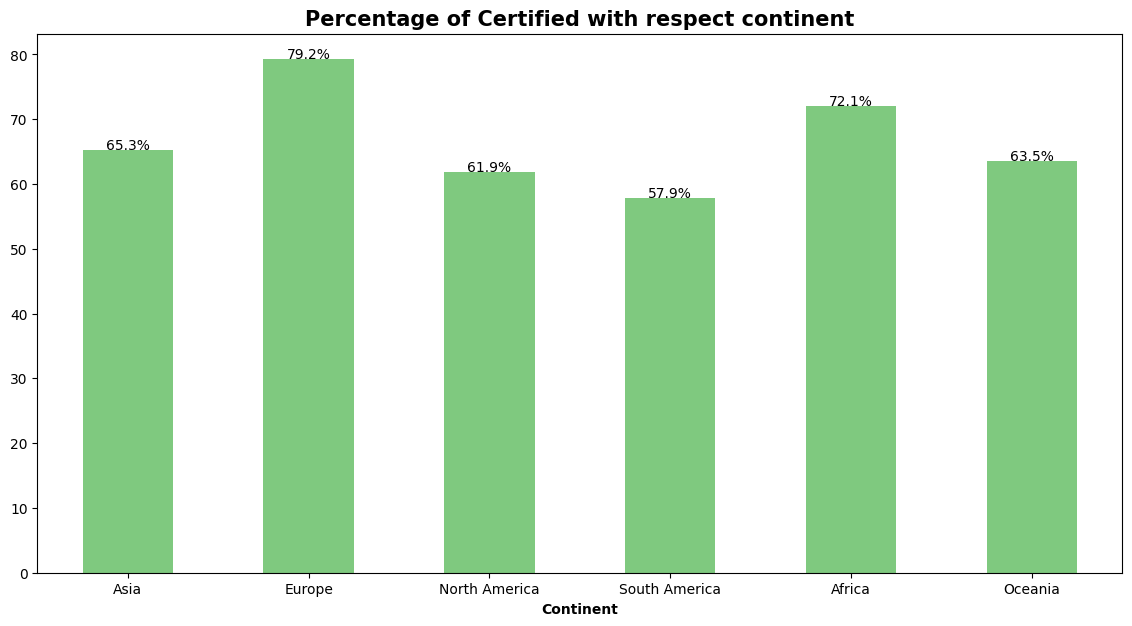

In [128]:
plt.figure(figsize=[14,7])
(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')


plt.title("Percentage of Certified with respect continent" , fontsize = 15, fontweight ='bold'  )


order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())


for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

## Report:

1. As per the Chart Asia applicants applied more than other continents.
2. 66% of Certified applications are from Asia.
3. This is followed by Europe with 15% of Certified applications.
4. Highest chance of getting certified if you are from Europe(80%) and followed by Africa(72%)

In [80]:
categorical_feature

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [81]:
#Application Education VS visa status:-
data.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

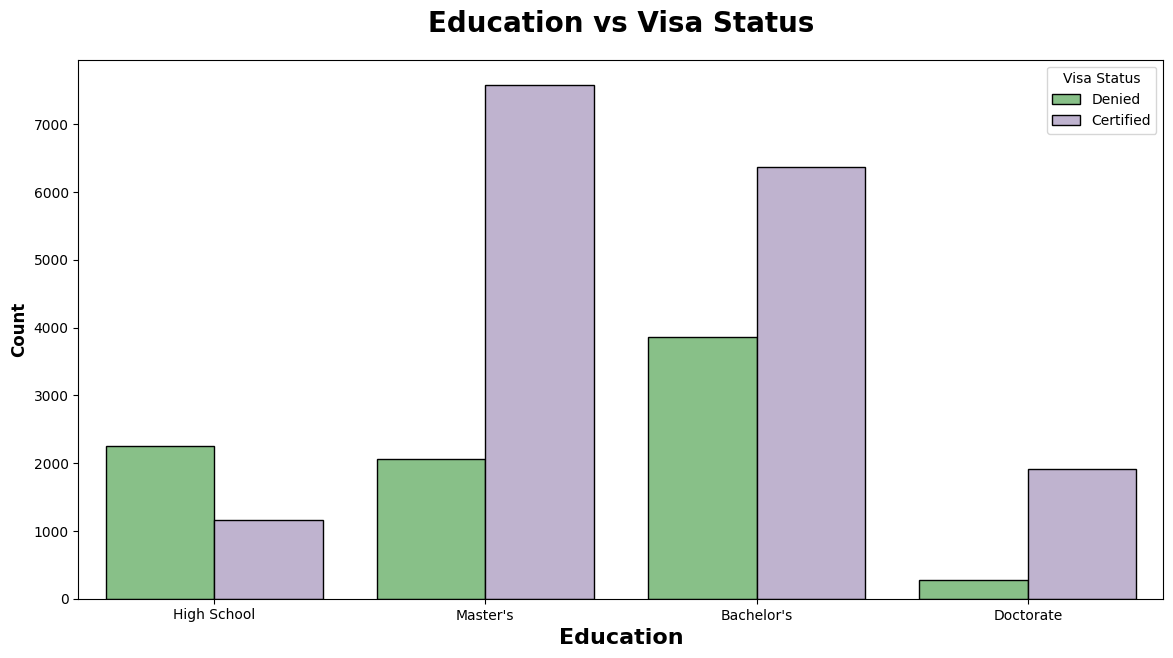

In [82]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=data, ec = "black",palette="Accent")
plt.title("Education vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_11656\2651621397.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


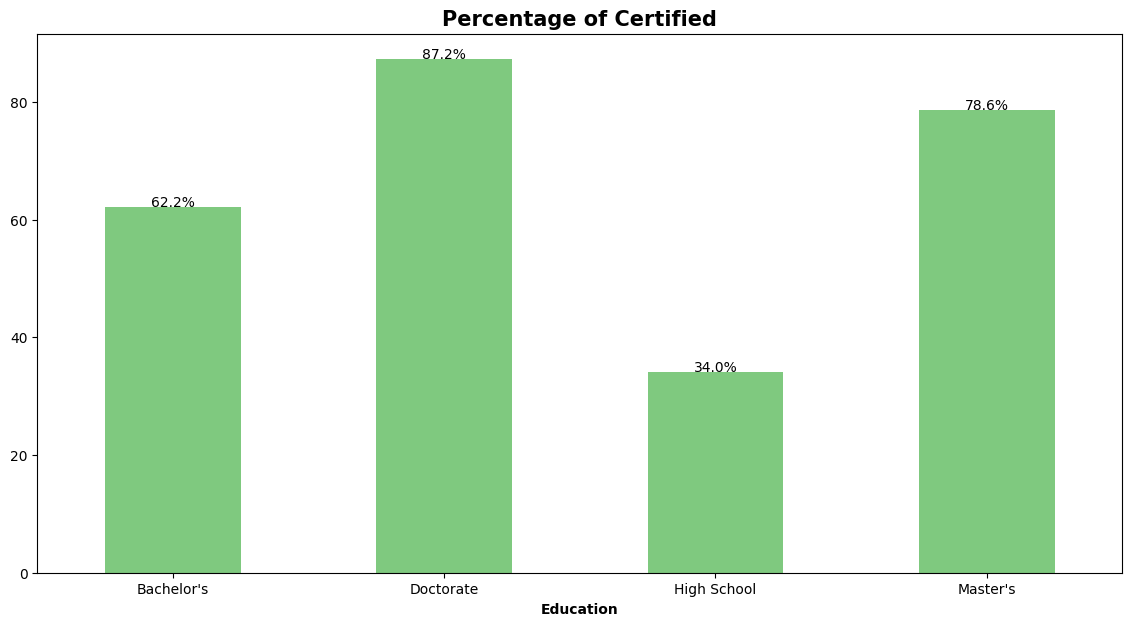

In [83]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Education' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [84]:
# Work Experience VS Visa Status:-
data.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

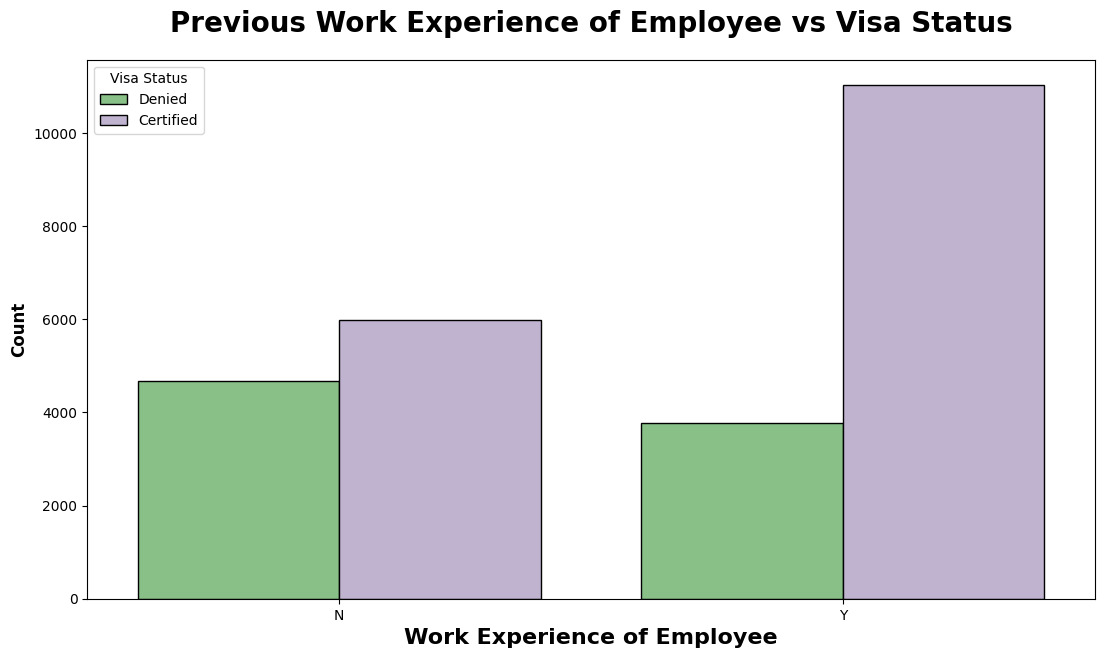

In [85]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=data, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_11656\679819683.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


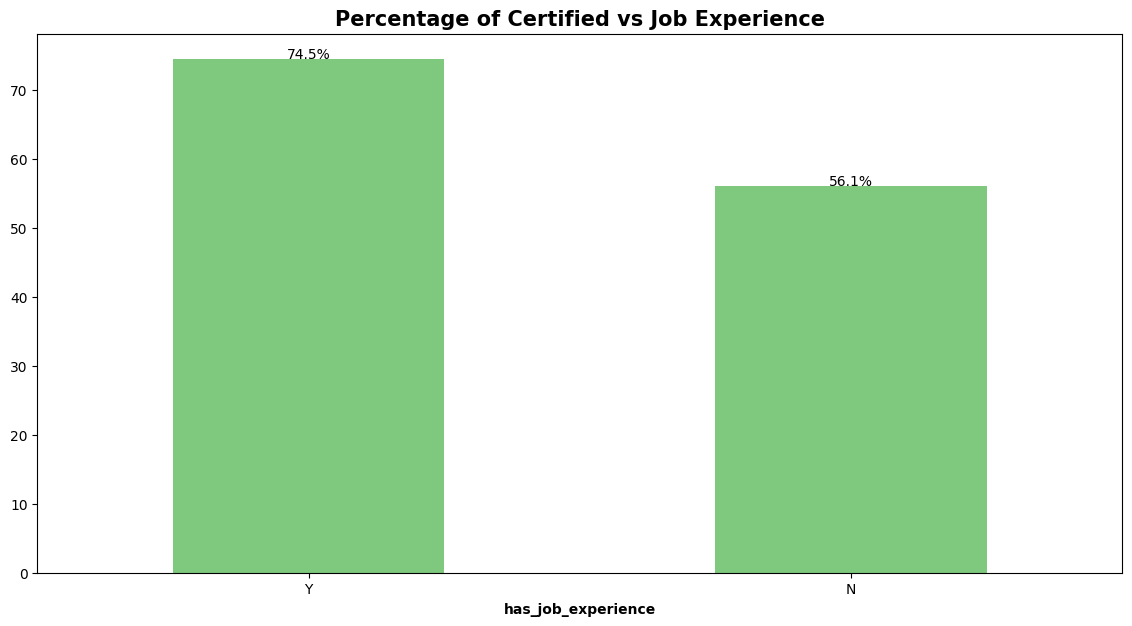

In [86]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

### Report

1. People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.
2. People with No previous work experience has been certified 56% and denied 43%.
3. This means work experience has effect on Visa status.
4. There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

In [87]:
#group data by requires_job_training and count case_status
data.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

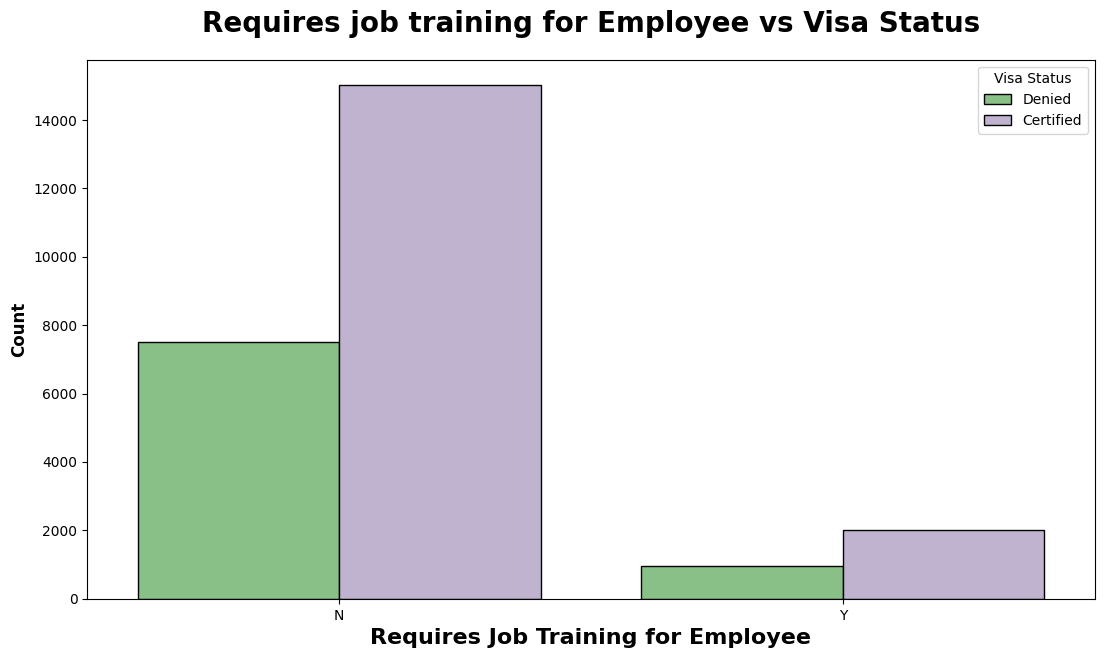

In [88]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=data, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_11656\88884806.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


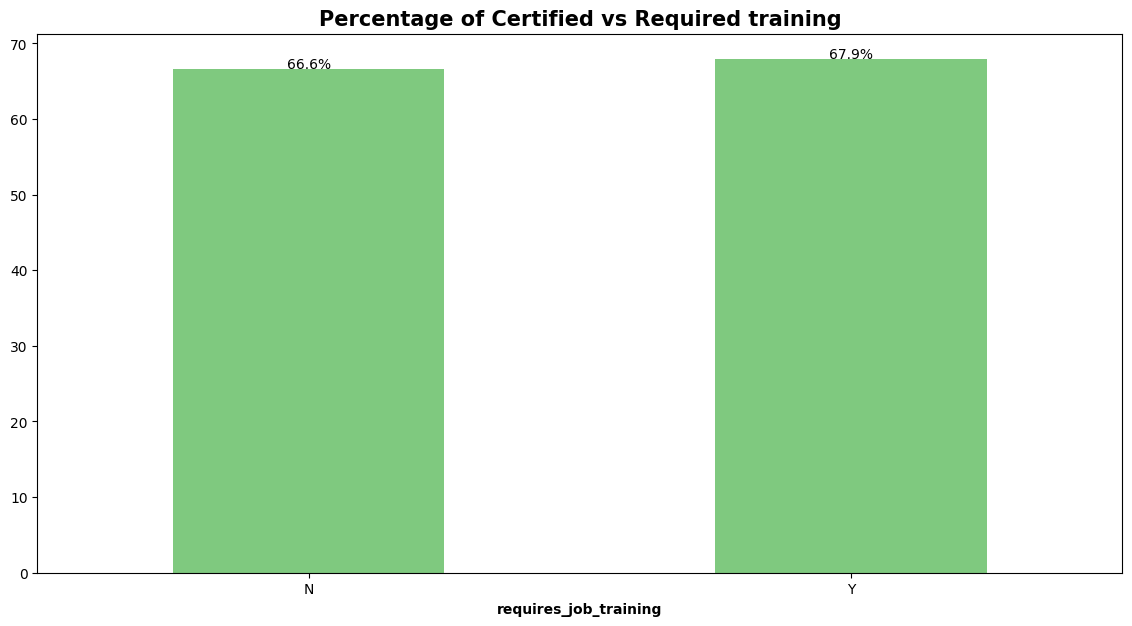

In [89]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

## Report

1. If employee requires job training and it doesn't have any effect on Visa status.
2. 88% of applicant don't require job training.
3. 63% of people who doesnt want job training got certified.
4. For employees who require job training 67% of people get certified.
5. As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot.

In [133]:
numerical_feature

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_11656\2911243619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="case_status",y='no_of_employees', data=data, palette="Accent")


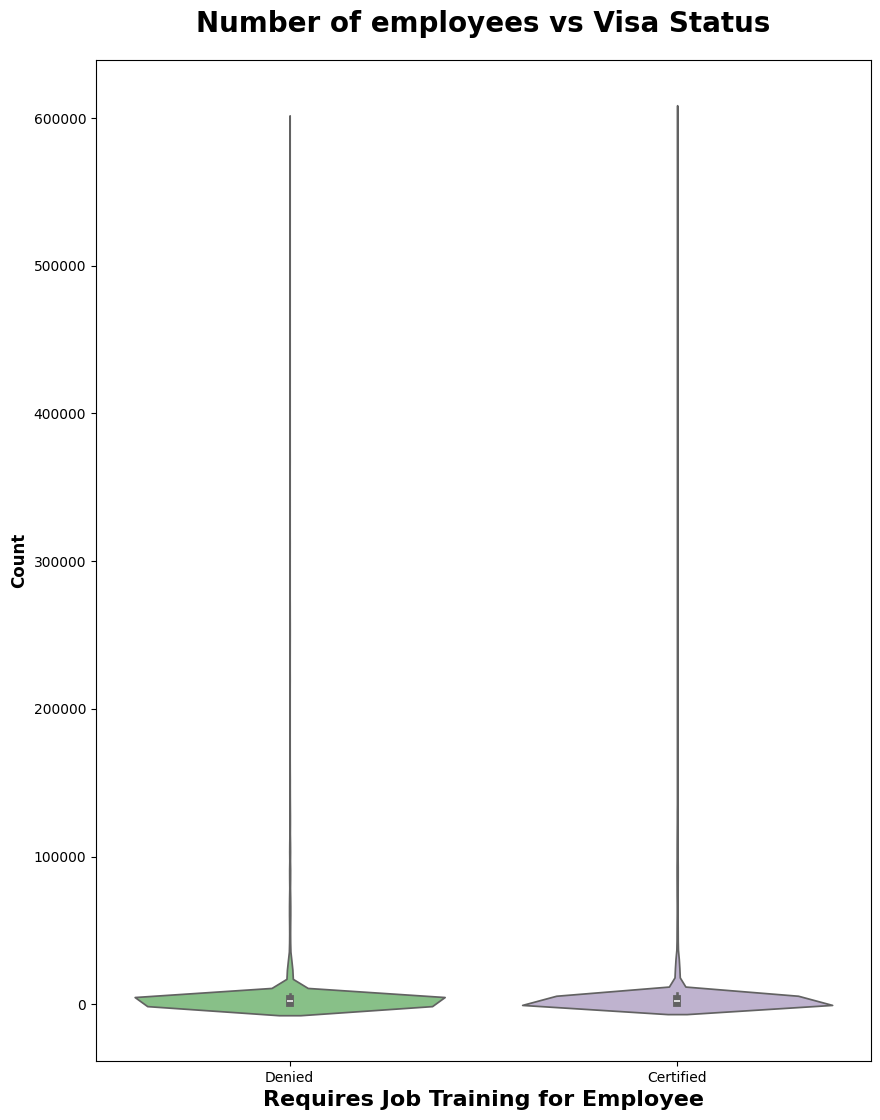

In [90]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=data, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

### Insights

The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

In [91]:
#group data by unit_of_wage and count the case_status
data.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

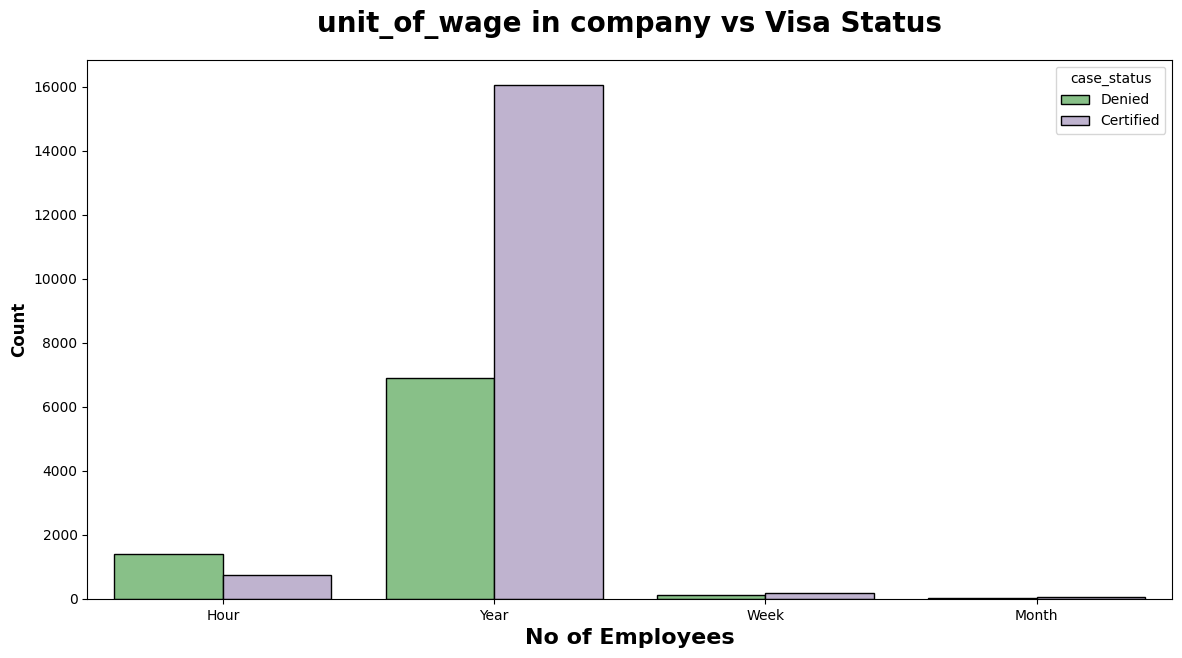

In [134]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=data,ec='k', palette='Accent')
plt.title("unit_of_wage in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_11656\1036700001.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


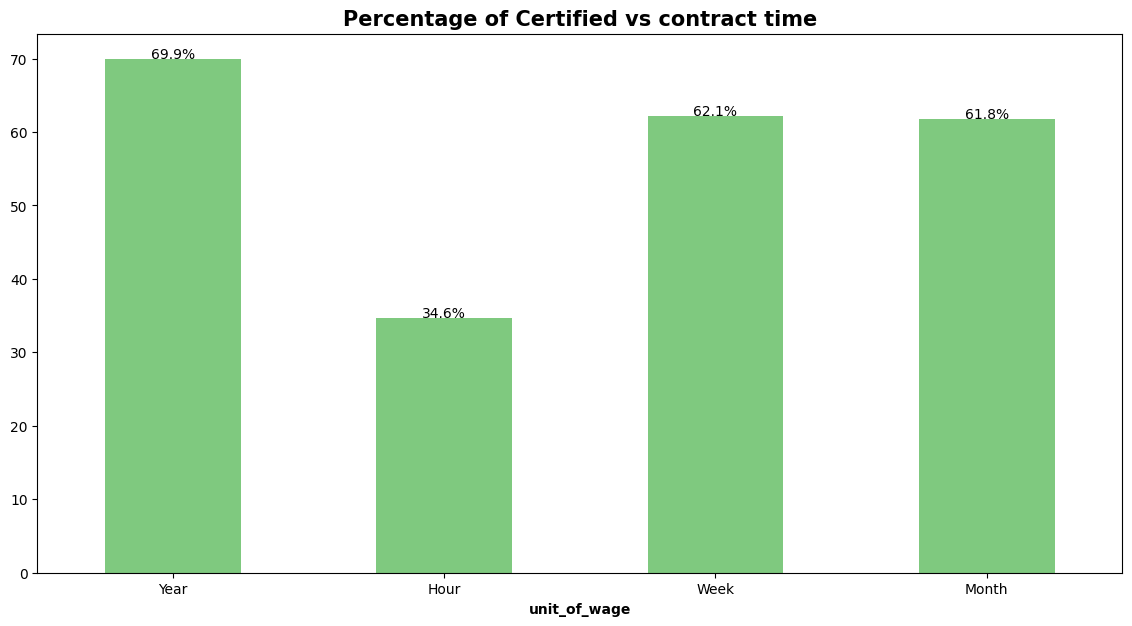

In [94]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

## Report

1. For employees who applied for hourly pay 65% of them were denied.
2. Yearly unit wage application were accepted for 69% and denied for 31% of the time.
3. There is a higher chance of yearly contract than other and immediately followed by week and month.

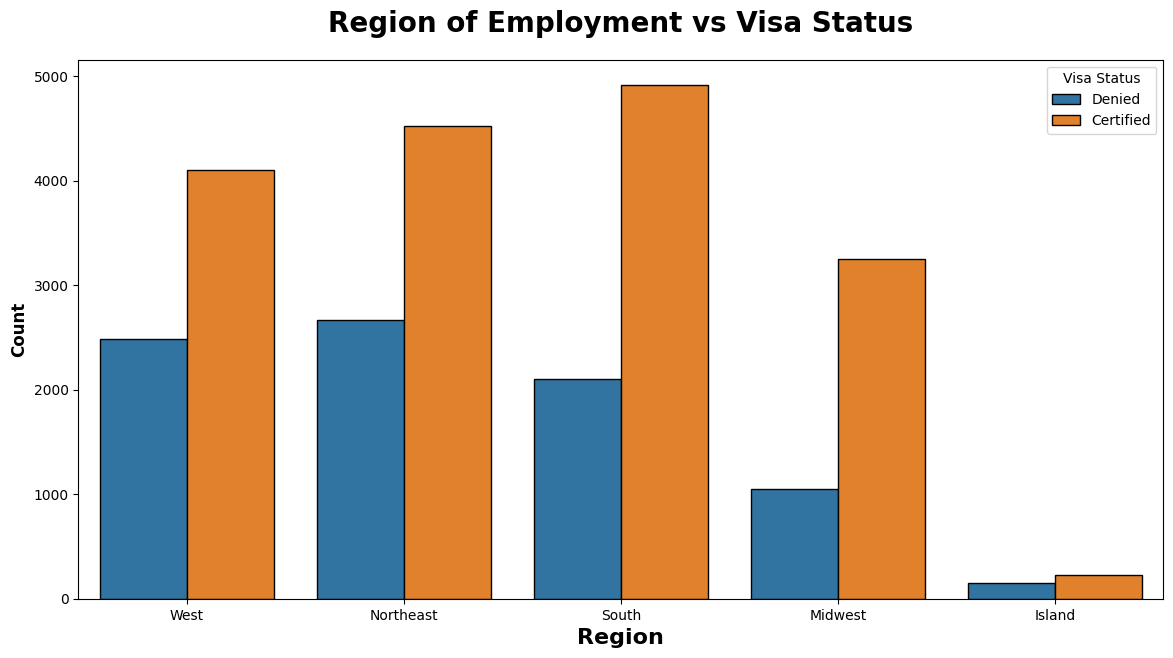

In [95]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=data,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_11656\817005242.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = order1[n]


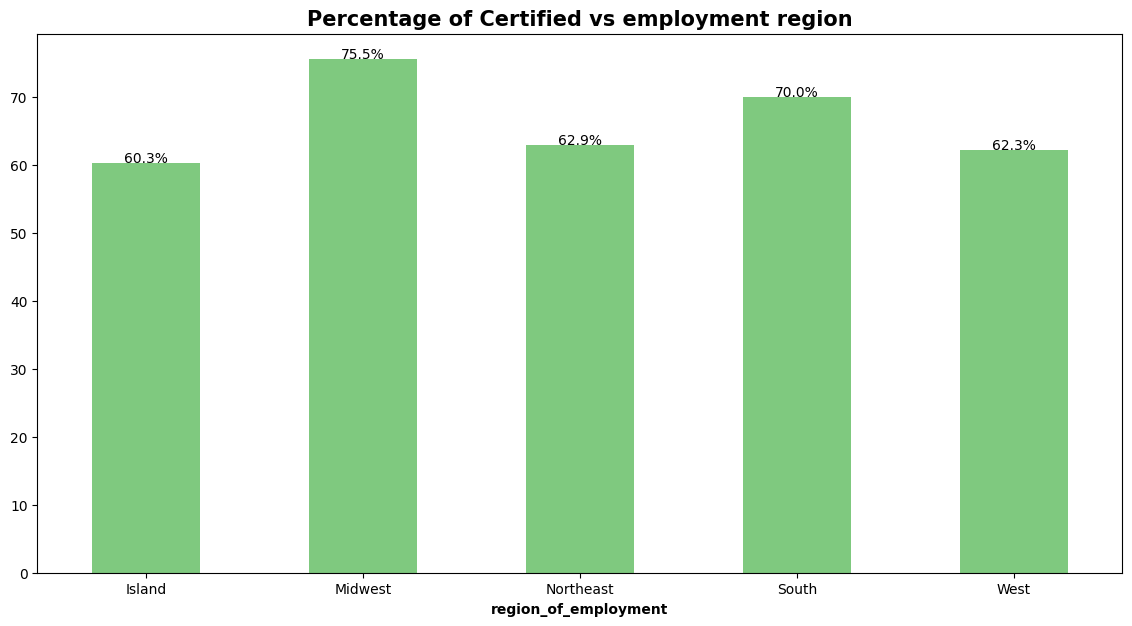

In [96]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

## Report

1. As per chart all the region have very similar pattern of getting Visa certified and Denied.
2. There is a slight edge for midwest followed by South region

In [97]:
data.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

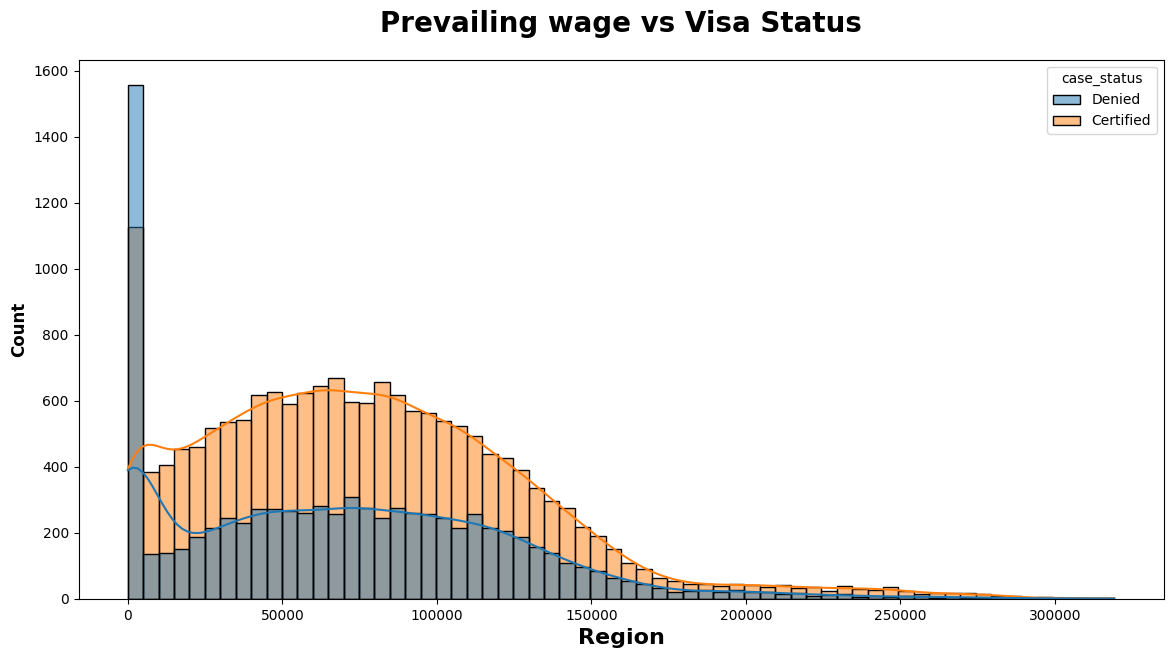

In [98]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=data, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

## Insights

The distribution of both the classes are same but need to handel the outliers.

In [99]:
print('Average Prevailing wage based on Employee education')
data.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_11656\768996777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=data,palette='bright')


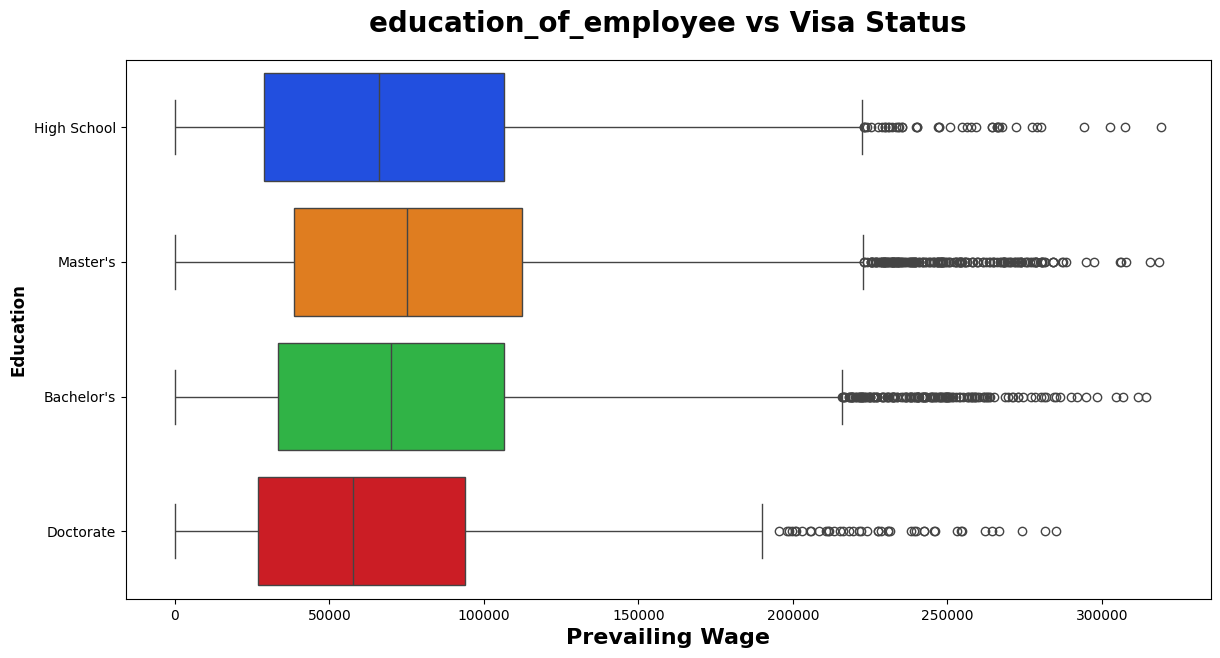

In [100]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=data,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

### Report

1. Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
2. Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

In [102]:
print('Median Prevailing wage based on Job experience')
data.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


### Report

1. Suprisingly people who has less job experience has more prevailing wage.
2. No job experience applicant has median prevailing wage as 72k USD.
3. Previous job experience applicant has median prevailing wage as 69K USD.

In [104]:
print('Average Prevailing wage based on Continent')
data.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_11656\3713048009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="continent",x = "prevailing_wage", data=data,palette='bright')


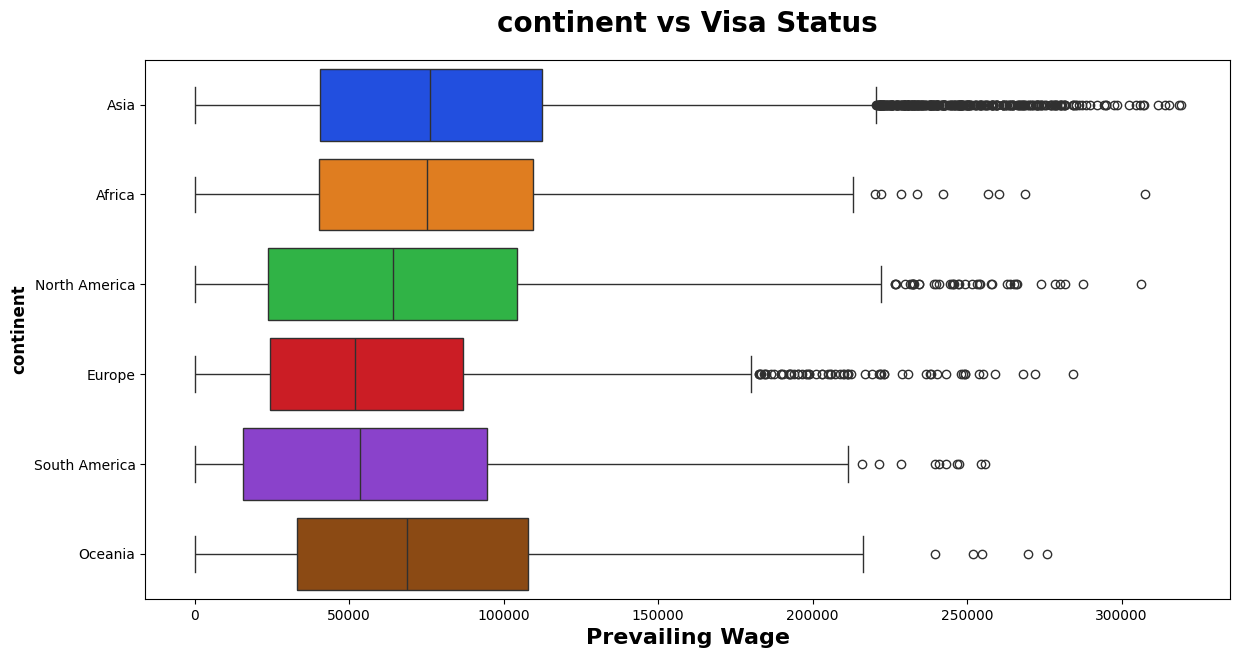

In [105]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=data,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

## Report

Average salary of people from Asia is higher than other continents.

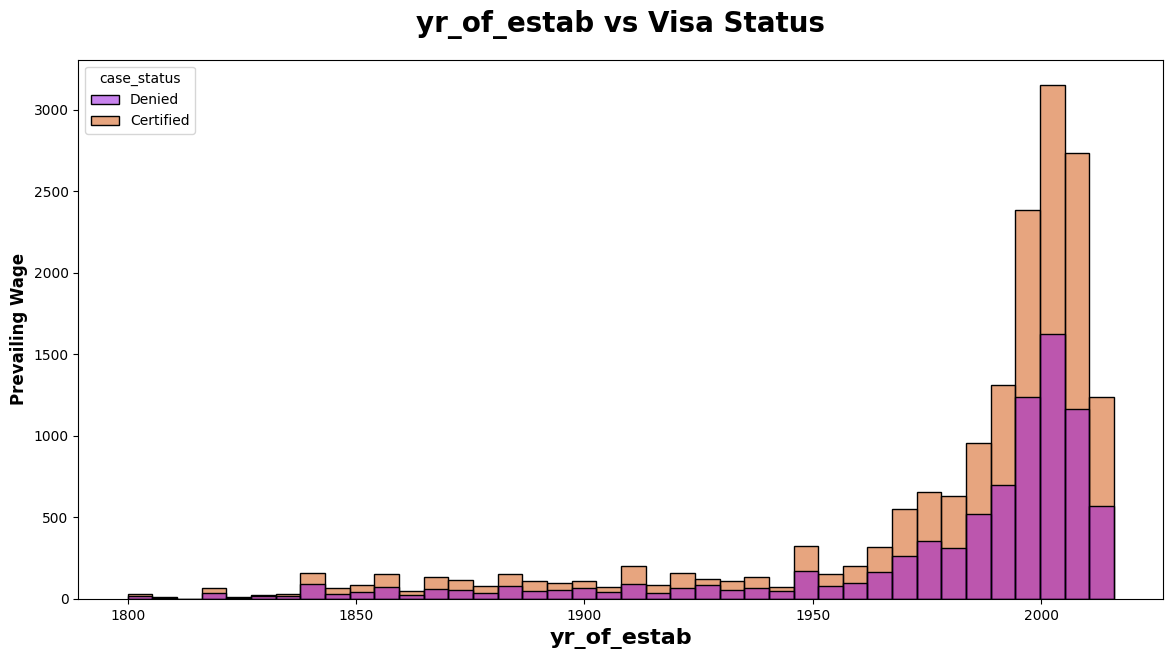

In [106]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=data,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

## Report

1. Each bins consists of 5 years.
2. Many companies were established after year 2000.
3. The most company establishment happened in year 2000-2005.

### Final Report
1. case_id column can be dropped as it is an ID.
2. requires_job_training column can be dropped as it doesn't have much impact on 3. target variable, Proved in visualization and chi2 test.
4. no_of_employees, prevailing_wage columns have outllier which should be handled.
5. continent columns has few unique values with very less count, which can be made as others
6. Target column case_status is imbalanced can be handled before model building.